In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

In [3]:
df.shape

(212331, 15)

In [4]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [5]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [6]:
df2 = df.sort_values(by='Total Tested',ascending=False)

In [7]:
df2

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
8612,13K430,Brooklyn Technical High School,High school,Physical Settings/Physics,2017,1729,82.7,122,7.1,1607,92.9,1171,67.7,na,na
34989,13K430,Brooklyn Technical High School,High school,Physical Settings/Physics,2017,1701,82.8,117,6.9,1584,93.1,1160,68.2,na,na
8611,13K430,Brooklyn Technical High School,High school,Physical Settings/Physics,2016,1648,79.8,193,11.7,1455,88.3,956,58,na,na
34987,13K430,Brooklyn Technical High School,High school,Physical Settings/Physics,2016,1629,79.9,189,11.6,1440,88.4,949,58.3,na,na
12137,20K445,New Utrecht High School,High school,Common Core English,2016,1554,70.7,360,23.2,1194,76.8,630,40.5,839,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102097,84X393,University Prep Charter High School,High school,Algebra2/Trigonometry,2016,1,s,s,s,s,s,s,s,na,na
185421,21K281,I.S. 281 Joseph B Cavallaro,Junior High-Intermediate-Middle,Common Core Algebra,2015,1,s,s,s,s,s,s,s,na,na
102111,84X393,University Prep Charter High School,High school,Common Core Algebra2,2016,1,s,s,s,s,s,s,s,na,na
185419,21K281,I.S. 281 Joseph B Cavallaro,Junior High-Intermediate-Middle,Common Core Algebra,2015,1,s,s,s,s,s,s,s,na,na


In [8]:
df3 = df2[df2['Total Tested'] > 1200]
#This is filtering to only show schools with greater than 1,200 students tested

In [9]:
df3.shape

(73, 15)

In [10]:
df4 = df3[((df3["Regents Exam"]=='Common Core English') & (df3["Year"]==2017))]
#This is filtering only Common Core English Exams taken in the year of 2017

In [11]:
	df5 = df4.drop_duplicates(subset=["School Name"]) 
 #This is dropping duplicate rows based on a School Name column

In [12]:
df5.shape

(6, 15)

In [13]:
df5['School Name'].unique()
#This is pulling all unique entries in the School Name column

array(['New Dorp High School', 'William Cullen Bryant High School',
       'Brooklyn Technical High School', 'Fort Hamilton High School',
       'Francis Lewis High School', 'Midwood High School'], dtype=object)

In [14]:
df5

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
16975,31R440,New Dorp High School,High school,Common Core English,2017,1392,78.9,169,12.1,1223,87.9,891,64,1011,72.6
16524,30Q445,William Cullen Bryant High School,High school,Common Core English,2017,1340,65.7,432,32.2,908,67.8,423,31.6,590,44
8591,13K430,Brooklyn Technical High School,High school,Common Core English,2017,1333,93,0,0,1333,100,1318,98.9,1327,99.5
12210,20K490,Fort Hamilton High School,High school,Common Core English,2017,1274,74.2,244,19.2,1030,80.8,698,54.8,825,64.8
14559,26Q430,Francis Lewis High School,High school,Common Core English,2017,1258,80.8,130,10.3,1128,89.7,891,70.8,988,78.5
12899,22K405,Midwood High School,High school,Common Core English,2017,1224,81.5,119,9.7,1105,90.3,879,71.8,957,78.2


In [15]:
df6=df5.drop(['School DBN', 'School Level', 'Number Scoring CR','Percent Scoring CR', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Mean Score', 'Percent Scoring 65 or Above', 'Percent Scoring 80 or Above'], axis=1)
#This is Removing all unnecessary columns

In [16]:
df6

,School Name,Regents Exam,Year,Total Tested,Number Scoring 65 or Above,Number Scoring 80 or Above
16975,New Dorp High School,Common Core English,2017,1392,1223,891
16524,William Cullen Bryant High School,Common Core English,2017,1340,908,423
8591,Brooklyn Technical High School,Common Core English,2017,1333,1333,1318
12210,Fort Hamilton High School,Common Core English,2017,1274,1030,698
14559,Francis Lewis High School,Common Core English,2017,1258,1128,891
12899,Midwood High School,Common Core English,2017,1224,1105,879


In [17]:
df6.round({"Mean Score":2, "Percent Scoring 80 or Above":2})

,School Name,Regents Exam,Year,Total Tested,Number Scoring 65 or Above,Number Scoring 80 or Above
16975,New Dorp High School,Common Core English,2017,1392,1223,891
16524,William Cullen Bryant High School,Common Core English,2017,1340,908,423
8591,Brooklyn Technical High School,Common Core English,2017,1333,1333,1318
12210,Fort Hamilton High School,Common Core English,2017,1274,1030,698
14559,Francis Lewis High School,Common Core English,2017,1258,1128,891
12899,Midwood High School,Common Core English,2017,1224,1105,879


In [18]:
df6.dtypes
#This is showing the different data types

School Name                   object
Regents Exam                  object
Year                           int64
Total Tested                   int64
Number Scoring 65 or Above    object
Number Scoring 80 or Above    object
dtype: object

In [19]:
df6["Number Scoring 65 or Above"] = df6["Number Scoring 65 or Above"].astype(str).astype(int)
#This is changing the data type from string to integer

In [20]:
df6["Number Scoring 80 or Above"] = df6["Number Scoring 80 or Above"].astype(str).astype(int)
#This is changing the data type from string to integer

In [21]:
df6["Year"] = df6["Year"].astype(int).astype(str)
#This is changing the data type from interger to string

In [23]:
df6.dtypes
#This is showing the different updated data types after converting

School Name                   object
Regents Exam                  object
Year                          object
Total Tested                   int64
Number Scoring 65 or Above     int64
Number Scoring 80 or Above     int64
dtype: object

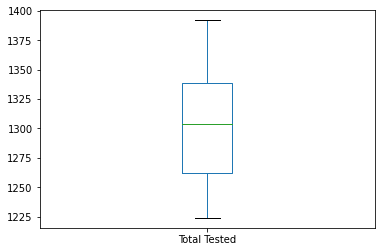

In [32]:
df6.plot(kind = 'box', x = 'Year', y = 'Total Tested')
#This is box plot is showing the total tested between the 6 schools. The median is close to 1300 students

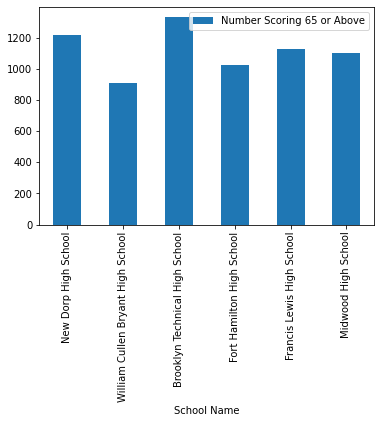

In [25]:
df6.plot(kind = 'bar', x = 'School Name', y = 'Number Scoring 65 or Above')
#This is a bar chart of the number of students that have an 65 or above score.

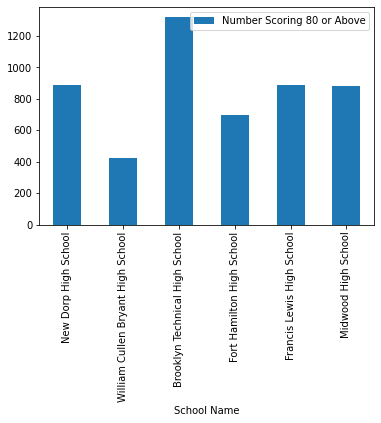

In [30]:
df6.plot(kind = 'bar', x = 'School Name', y = 'Number Scoring 80 or Above')
#This is a bar chart of the number of students that have an 80 or above score.

For my project, I did not want to focus on a single school and chose to focus on the schools that have tested for Common Core English with over 1,200 students taking the exam, which brought me to 6 schools. I was having some trouble converting the data types of the mean score and the percentages so I could only work with the number of students. Therefore I created 3 visuals: The first visual shows the total tested between the 6 schools and was able to identify that the median is roughly around 1300 students. The second visual shows the number of students that have an 65 or above score, the school with the most was Brooklyn Technical High School. The third visual shows the number of students that have an 80 or above score, the school with the most was Brooklyn Technical High School.